# Windkraft - Python-Code zur Auslegung von Windkraftanlagen

[Prof. Dr.-Ing. Matthias Stripf](mailto:matthias.stripf@hs-karlsruhe.de)

<a id='betz_limit'></a>
### Berechnung des Betz-Limits

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib
from matplotlib import rc
from __future__ import unicode_literals
rc('text', usetex=False)
rc('font', size=9)
rc('text.latex', unicode=True)
rc('axes', titlesize=12)
rc('pdf', fonttype=42)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

def func(x, pos):  # formatter function takes tick label and tick position
    s = str(x)
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:]   # change dot to comma

xy_format = tkr.FuncFormatter(func)  # make formatter

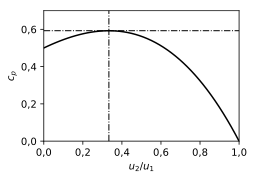

In [2]:
def cp(u2byu1):
    return 0.5*(1-u2byu1**2)*(1+u2byu1)

u2byu1 = np.linspace(0,1,50)

fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
axes.xaxis.set_major_formatter(xy_format)
axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,1)
plt.ylim(0,0.7)
plt.plot(u2byu1,cp(u2byu1),'k')
plt.plot(u2byu1,np.full_like(u2byu1,16/27),'k-.', lw=1)
plt.plot(np.full_like(u2byu1,1/3),np.linspace(0,0.7,50),'k-.', lw=1)
plt.xlabel('$u_2/u_1$')
plt.ylabel('$c_p$');
#fig1.savefig("bild10_2_raw.pdf", bbox_inches='tight')

<a id='cacws809'></a>
### Auftriebs- und Widerstandsbeiwerte des Profils S809

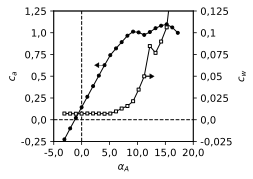

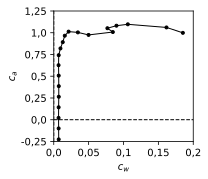

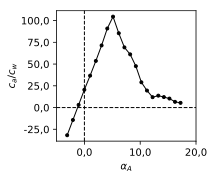

In [3]:
airfoil_file = 'S809Re2Mio_smooth.txt'
data = np.loadtxt(airfoil_file)

alpha = data[:,0]
c_a = data[:,1]
c_w = data[:,2]

fig1, ax1 = plt.subplots(figsize=(2.5,2.4))
ax1.xaxis.set_major_formatter(xy_format)
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(-5,20)
ax1.set_ylim(-0.25,1.25)
ax1.plot(alpha,c_a,'k-o', markersize=3, lw=1)
ax1.set_xlabel('$\\alpha_A$')
ax1.set_ylabel('$c_a$')
ax1.arrow(alpha[7], c_a[7], -1, 0, lw=0.3, head_length=0.8, head_width=.06, fc='k', ec='k')
ax1.set_xticks(np.arange(-5.0, 21.0, 5.0))      

ax2 = ax1.twinx()
ax2.plot(alpha,c_w,'k-s', markersize=3, lw=1, markeredgewidth=1, markeredgecolor='k', markerfacecolor='white' ) #, markerfacecoloralt='white')
ax2.set_ylim(-0.025,0.125)
ax2.set_ylabel('$c_w$')
ax2.arrow(alpha[14], c_w[14], 1, 0, lw=0.3, head_length=0.8, head_width=.006, fc='k', ec='k')
ax2.yaxis.set_major_formatter(xy_format)
ax1.axvline(0, lw=1, linestyle='--', color='k')
ax1.axhline(0, lw=1, linestyle='--', color='k')
#fig1.savefig("bild10_5a_raw.pdf", bbox_inches='tight')

fig1, ax1 = plt.subplots(figsize=(2.5,2.4))
ax1.xaxis.set_major_formatter(xy_format)
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(0,0.2)
ax1.set_ylim(-0.25,1.25)
ax1.plot(c_w,c_a,'k-o', markersize=3, lw=1)
ax1.set_xlabel('$c_w$')
ax1.set_ylabel('$c_a$')
ax1.axvline(0, lw=1, linestyle='--', color='k')
ax1.axhline(0, lw=1, linestyle='--', color='k')
#fig1.savefig("bild10_5b_raw.pdf", bbox_inches='tight')

fig1, ax1 = plt.subplots(figsize=(2.5,2.4))
ax1.xaxis.set_major_formatter(xy_format)
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(-5,20)
ax1.plot(alpha,c_a/c_w,'k-o', markersize=3, lw=1)
ax1.set_xlabel('$\\alpha_A$')
ax1.set_ylabel('$c_a/c_w$')
ax1.axvline(0, lw=1, linestyle='--', color='k')
ax1.axhline(0, lw=1, linestyle='--', color='k');
#fig1.savefig("bild10_5c_raw.pdf", bbox_inches='tight')

<a id='c_von_r_ohne_drall'></a>
### Sehnenlänge als Funktion des Radius (ohne Berücksichtigung des Dralls)

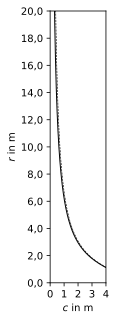

In [4]:
import math

def c(r, ca, lamb, R, z):
    return 2*np.pi*R*8/(9*z*ca*lamb*np.sqrt(4/9+lamb**2*r**2/R**2))

def alpha_f(r, R, lamb):
    return np.arctan(2*R/(3*lamb*r))

def c_exakt(r, ca, lamb, R, z, phi, alpha):
    return (16/27*2*np.pi*R**3*math.sin(phi)*np.cos(alpha)**2 
            / (z*ca*lamb**3*r**2*np.sin(phi-(np.pi/2-alpha))))

R = 20.0
z = 3
lamb = 12

ca = c_a[9]
cw = c_w[9]
phi = math.atan(ca/cw)

r = np.linspace(0.1,R,200)
chord = c(r, ca, lamb, R, z)
alp = alpha_f(r, R, lamb)

chord_exakt = c_exakt(r, ca, lamb, R, z, phi, alp)

fig1, ax1 = plt.subplots(figsize=(1,5))
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(0,4)
ax1.set_ylim(0,20)
ax1.plot(chord, r,'-k', markersize=3, lw=1)
ax1.plot(chord_exakt, r,'--k', markersize=1, lw=0.6)
ax1.set_xlabel('$c$ in m')
ax1.set_ylabel('$r$ in m')
ax1.set_xticks(np.arange(0, 5, 1))      
ax1.set_yticks(np.arange(0.0, 21.0, 2.0));     

#fig1.savefig("bild10_7_lamb12z6.pdf", bbox_inches='tight')

<a id='c_von_r_mit_drall'></a>
### Sehnenlänge als Funktion des Radius (mit Berücksichtigung des Dralls)

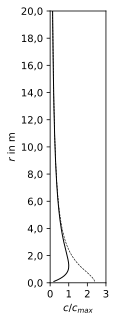

In [5]:
def c_drall(r, ca, lamb, R, z):
    return 2*np.pi*8*r*np.sin(1/3*np.arctan(R/(lamb*r)))**2/(z*ca)

chord_drall = c_drall(r, ca, lamb, R, z)

fig1, ax1 = plt.subplots(figsize=(1,5))
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(0,3)
ax1.set_ylim(0,20)
ax1.plot(chord_drall/np.max(chord_drall), r,'-k', markersize=3, lw=1)
ax1.plot(chord/np.max(chord_drall), r,'--k', markersize=1, lw=0.6)
ax1.set_xlabel('$c/c_{max}$')
ax1.set_ylabel('$r$ in m')
ax1.set_xticks(np.arange(0, 4, 1))      
ax1.set_yticks(np.arange(0.0, 21.0, 2.0));   
#fig1.savefig("bild10_8_lamb1.pdf", bbox_inches='tight');

<a id='alpha_von_r_mit_drall'></a>
### Optimaler Anströmwinkel als Funktion des Radius (mit Berücksichtigung des Dralls)

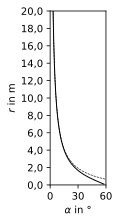

In [6]:
def alpha_drall(r, R, lamb):
    return 2/3*np.arctan(R/(lamb*r))

alp = alpha_f(r, R, lamb)
alp_drall = alpha_drall(r, R, lamb)

fig1, ax1 = plt.subplots(figsize=(1,3.2))
ax1.yaxis.set_major_formatter(xy_format)
ax1.set_xlim(0,60)
ax1.set_ylim(0,20)
ax1.plot(alp_drall*180/math.pi, r,'-k', markersize=3, lw=1)
ax1.plot(alp*180/math.pi, r,'--k', markersize=1, lw=0.6)
ax1.set_xlabel('$\\alpha$ in °')
ax1.set_ylabel('$r$ in m')
ax1.set_xticks(np.arange(0, 61, 30))      
ax1.set_yticks(np.arange(0.0, 21.0, 2.0));   
#fig1.savefig("bild10_9_lamb12.pdf", bbox_inches='tight');

<a id='c_p_auslegungspunkt'></a>
### Einflüsse auf den Leistungsbeiwert im Auslegungspunkt

In [7]:
import sympy as sp
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
init_printing(use_latex=True)

def cp_Drall(lamb):
    l, rbyR = sp.symbols('l, rbyR')
    l = lamb
    arg = (4*l*(rbyR**2)*sp.sin(2/3*sp.atan(1/(l*rbyR)))**3)/(sp.sin(sp.atan(1/(l*rbyR)))**2)

    return sp.Integral(arg,(rbyR,0,1)).evalf()

def eta_Reibung(lamb, epsilon):
    return 1-lamb/epsilon

def eta_tip(lamb, z):
    return (1-0.92/(z*np.sqrt(lamb**2+4/9)))**2

lam = np.linspace(0.01,12,50)
cp_dr = np.empty_like(lam)

for i, l in enumerate(lam):
    cp_dr[i] = cp_Drall(l)

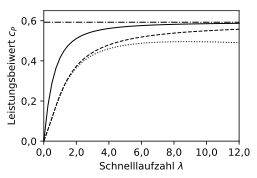

In [8]:
fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
axes.xaxis.set_major_formatter(xy_format)
axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,12)
plt.ylim(0,0.65)
plt.plot(lam, np.full_like(lam, 16/27),'k-.', lw=1)
plt.plot(lam ,cp_dr,'k-', lw=1)
plt.plot(lam ,cp_dr*eta_tip(lam, 3),'k--', lw=1)
plt.plot(lam ,cp_dr*eta_Reibung(lam, 100)*eta_tip(lam, 3),'k:', lw=1)

plt.xlabel('Schnelllaufzahl $\\lambda$')
plt.ylabel('Leistungsbeiwert $c_P$');
fig1.savefig("bild10_10_raw.pdf", bbox_inches='tight');

<a id='c_P_auslegungspunkt'></a>
### Leistungsbeiwert bei Abweichung vom Auslegungspunkt

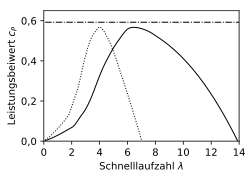

In [9]:
from scipy import interpolate

def dPb(z, ca, cw, rho, c, alpha_einbau, lam, r, dr, R, u1):
    alpha = math.atan(2*R/(3*lam*r))
    alpha_A = alpha-alpha_einbau
    #print (alpha_A*180/math.pi)
    if alpha_A*180/math.pi < -3:
        alpha_A = -3*math.pi/180
    if alpha_A*180/math.pi > 17:
        alpha_A = 17*math.pi/180
    #print (alpha*180/math.pi, alpha_einbau*180/math.pi, alpha_A*180/math.pi)
    phi = math.atan(float(ca(alpha_A))/float(cw(alpha_A)))
    c1 = z*ca(alpha_A)*0.5*rho*c*dr/math.sin(phi)
    c2 = (lam*u1*r/(R*math.cos(alpha)))**2
    c3 = math.sin(phi-(math.pi/2-alpha))
    c4 = r/R*lam*u1
    return c1*c2*c3*c4

ca_int = interpolate.InterpolatedUnivariateSpline(alpha*math.pi/180, c_a)
cw_int = interpolate.InterpolatedUnivariateSpline(alpha*math.pi/180, c_w)

R = 20
z = 3
rho = 1
alpha_A = 5.13*math.pi/180
lam_A = 6.0
u1 = 10.0
N = 50

r = np.linspace(0.1,R, N)
#chord = c_drall(r, ca_int(alpha_A), lam_A, R, z)
chord = c(r, ca_int(alpha_A), lam_A, R, z)
#alpha_einbau = alpha_drall(r, R, lam_A) - alpha_A
alpha_einbau = alpha_f(r,R,lam_A) - alpha_A

#plt.plot(r,c)
#plt.plot(r,alpha_einbau*180/math.pi)

dr = (R-0.1)/N
lam = np.linspace(0.1,14, 100)
cP6 = np.empty_like(lam)
P6 = np.empty_like(lam) 
for j, lamj in enumerate(lam):
    P = 0
    for i, ri in enumerate(r):
        P += dPb(z, ca_int, cw_int, rho, chord[i], alpha_einbau[i], lamj, ri, dr, R, u1)

    P0 = 0.5*rho*math.pi*R**2*u1**3
    #print (P/P0)
    P6[j] = P
    cP6[j] = P/P0

lam_A = 4.0

#chord = c_drall(r, ca_int(alpha_A), lam_A, R, z)
chord = c(r, ca_int(alpha_A), lam_A, R, z)
#alpha_einbau = alpha_drall(r, R, lam_A) - alpha_A
alpha_einbau = alpha_f(r,R,lam_A) - alpha_A

#plt.plot(r,c)
#plt.plot(r,alpha_einbau*180/math.pi)

dr = (R-0.1)/N
cP4 = np.empty_like(lam)
P4 = np.empty_like(lam) 

for j, lamj in enumerate(lam):
    P = 0
    for i, ri in enumerate(r):
        P += dPb(z, ca_int, cw_int, rho, chord[i], alpha_einbau[i], lamj, ri, dr, R, u1)

    P0 = 0.5*rho*math.pi*R**2*u1**3
    #print (P/P0)
    P4[j] = P
    cP4[j] = P/P0
    
fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
#axes.xaxis.set_major_formatter(xy_format)
axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,14)
plt.ylim(0,0.65)
plt.plot(lam, np.full_like(lam, 16/27),'k-.', lw=1)
plt.plot(lam, cP6,'k-', lw=1)
plt.plot(lam, cP4,'k:', lw=1)
axes.set_xticks(np.arange(0, 16, 2))    

plt.xlabel('Schnelllaufzahl $\\lambda$')
plt.ylabel('Leistungsbeiwert $c_P$');
fig1.savefig("bild10_11_raw.pdf", bbox_inches='tight');

<a id='c_M_auslegungspunkt'></a>
### Momentenbeiwert bei Abweichung vom Auslegungspunkt

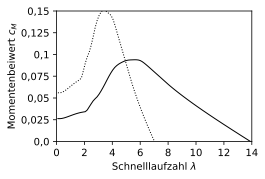

In [10]:
cM6 = cP6 / lam
cM4 = cP4 / lam

fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
#axes.xaxis.set_major_formatter(xy_format)
axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,14)
plt.ylim(0,0.15)
plt.plot(lam, np.full_like(lam, 16/27),'k-.', lw=1)
plt.plot(lam, cM6,'k-', lw=1)
plt.plot(lam, cM4,'k:', lw=1)
axes.set_xticks(np.arange(0, 16, 2))    

plt.xlabel('Schnelllaufzahl $\\lambda$')
plt.ylabel('Momentenbeiwert $c_M$');
fig1.savefig("bild10_13_raw.pdf", bbox_inches='tight');

<a id='P_auslegungspunkt'></a>
### Leistung bei Abweichung vom Auslegungspunkt

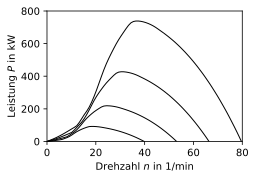

In [11]:
R = 20
z = 3
rho = 1.2
alpha_A = 5.13*math.pi/180
lam_A = 6.0
N = 50

r = np.linspace(0.1,R, N)
#chord = c_drall(r, ca_int(alpha_A), lam_A, R, z)
chord = c(r, ca_int(alpha_A), lam_A, R, z)
#alpha_einbau = alpha_drall(r, R, lam_A) - alpha_A
alpha_einbau = alpha_f(r,R,lam_A) - alpha_A

#plt.plot(r,c)
#plt.plot(r,alpha_einbau*180/math.pi)
dr = (R-0.1)/N

n = np.linspace(0.1,100, 100)

def calc_Pvsn(z, ca_int, cw_int, rho, chord, alpha_einbau, n, r, dr, R, u1):
    lam = n/60*2*math.pi*R/u1
    #print (lam)
    P_ges = np.empty_like(lam) 
    for j, lamj in enumerate(lam):
        P = 0
        for i, ri in enumerate(r):
            P += dPb(z, ca_int, cw_int, rho, chord[i], alpha_einbau[i], lamj, ri, dr, R, u1)
        P_ges[j] = P
        P0 = 0.5*rho*math.pi*R**2*u1**3
        M0 = 0.5*rho*math.pi*R**3*u1**2
        cP = P_ges/P0
        cM = cP/lam
        M = cM*M0
        
    return P_ges, M, cP, cM
        
fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
#axes.xaxis.set_major_formatter(xy_format)
#axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,80)
plt.ylim(0,800)

P1, M1, _, _ = calc_Pvsn(z, ca_int, cw_int, rho, chord, alpha_einbau, n, r, dr, R, 6)
plt.plot(n, P1/1000,'k-', lw=1)

P2, M2, _, _ = calc_Pvsn(z, ca_int, cw_int, rho, chord, alpha_einbau, n, r, dr, R, 8)
plt.plot(n, P2/1000,'k-', lw=1)

P3, M3, _, _ = calc_Pvsn(z, ca_int, cw_int, rho, chord, alpha_einbau, n, r, dr, R, 10)
plt.plot(n, P3/1000,'k-', lw=1)

P4, M4, _, _ = calc_Pvsn(z, ca_int, cw_int, rho, chord, alpha_einbau, n, r, dr, R, 12)
plt.plot(n, P4/1000,'k-', lw=1)

#axes.set_xticks(np.arange(0, 16, 2))    

plt.xlabel('Drehzahl $n$ in 1/min')
plt.ylabel('Leistung $P$ in kW');
fig1.savefig("bild10_12_raw.pdf", bbox_inches='tight');

<a id='M_auslegungspunkt'></a>
### Drehmoment bei Abweichung vom Auslegungspunkt

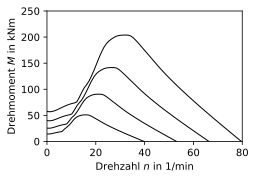

In [12]:
fig1 = plt.figure(figsize=(3.5,2.4))
axes = plt.gca()
#axes.xaxis.set_major_formatter(xy_format)
#axes.yaxis.set_major_formatter(xy_format)
plt.xlim(0,80)
plt.ylim(0,250)

plt.plot(n, M1/1000,'k-', lw=1)

plt.plot(n, M2/1000,'k-', lw=1)

plt.plot(n, M3/1000,'k-', lw=1)

plt.plot(n, M4/1000,'k-', lw=1)

plt.xlabel('Drehzahl $n$ in 1/min')
plt.ylabel('Drehmoment $M$ in kNm');
fig1.savefig("bild10_14_raw.pdf", bbox_inches='tight');


---
###### Copyright (c) 2017, Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()